In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
import cv2

In [6]:
(trainData, trainLabels), (testData, testLabels) = datasets.cifar10.load_data() # užkraunami duomenys

trainLabels = trainLabels.reshape(-1,) #Pakeičiamos duomenų pateiktys
testLabels = testLabels.reshape(-1,)

trainData = trainData / 255 # normalizuojami duomenys
testData = testData / 255


x = np.concatenate([trainData, testData]) # duomenys sujungiami į vieną sąrašą
y = np.concatenate([trainLabels, testLabels])

trainData, testData, trainLabels, testLabels = train_test_split(x, y, test_size=0.2) #duomenys paskirstomi į mokymo ir vertinimo
print (len(trainData))
print (len(testData))



48000
12000


In [7]:
classes = ["plane","car","bird","cat","deer","dog","frog","horse","ship","truck" ]

In [8]:
def data_check(data, label, i): # funkcija skirta patikrinti duomenis
    plt.figure(figsize = (15,2))
    plt.imshow(data[i])
    plt.xlabel(classes[label[i]])
    

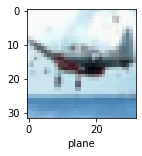

In [99]:
data_check(trainData, trainLabels, random.randint(0,len(testLabels)))

In [14]:
#trainData = tf.image.rgb_to_grayscale( # paruošiami duomenys
#    trainData, name=None
#)

tf.image.random_flip_left_right(
    trainData, seed=None
)

<tf.Tensor: shape=(48000, 32, 32, 3), dtype=float64, numpy=
array([[[[0.65882353, 0.73333333, 0.85882353],
         [0.66666667, 0.74117647, 0.86666667],
         [0.66666667, 0.74117647, 0.86666667],
         ...,
         [0.71764706, 0.77254902, 0.89803922],
         [0.71764706, 0.77254902, 0.89411765],
         [0.72941176, 0.78039216, 0.90588235]],

        [[0.64705882, 0.73333333, 0.8627451 ],
         [0.65882353, 0.74117647, 0.87058824],
         [0.65882353, 0.74117647, 0.8745098 ],
         ...,
         [0.71764706, 0.78039216, 0.9254902 ],
         [0.72156863, 0.77254902, 0.91372549],
         [0.73333333, 0.78039216, 0.92156863]],

        [[0.63137255, 0.72156863, 0.85490196],
         [0.63921569, 0.72941176, 0.8627451 ],
         [0.63921569, 0.72941176, 0.8627451 ],
         ...,
         [0.67843137, 0.76862745, 0.89411765],
         [0.68627451, 0.77647059, 0.90196078],
         [0.69019608, 0.78431373, 0.91372549]],

        ...,

        [[0.29019608, 0.41960784

In [77]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [78]:
model = tf.keras.models.Sequential() #pradedamas kurti modelis

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', input_shape = (32,32,3))) # pridedami sluoksniai
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(10, activation = 'softmax'))



In [94]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #sukuriamas optimizuotojas #Nadam

model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics =['accuracy']) #sukuriamas modelis #mse

In [98]:
history = model.fit(trainData, trainLabels, epochs = 1, batch_size = 64, validation_split = 0.1) # modelis apmokomas

675/675 [==============================] - 20s 30ms/step - loss: 0.4225 - accuracy: 0.8550 - val_loss: 1.3482 - val_accuracy: 0.6423


In [97]:
acc, loss = model.evaluate(testData, testLabels) #modelis įvertinamas

375/375 [==============================] - 2s 4ms/step - loss: 1.2479 - accuracy: 0.6323


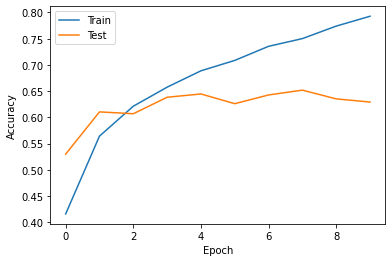

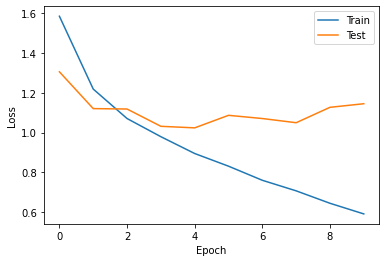

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', "Test"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', "Test"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [32]:
predictions = model.predict(testData)
predictedLabels = [np.argmax(data) for data in predictions]

In [33]:
def prediction_check(i):
    print(classes[predictedLabels[i]])
    data_check(testData, testLabels, i)

In [34]:
from mlxtend.plotting import  plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

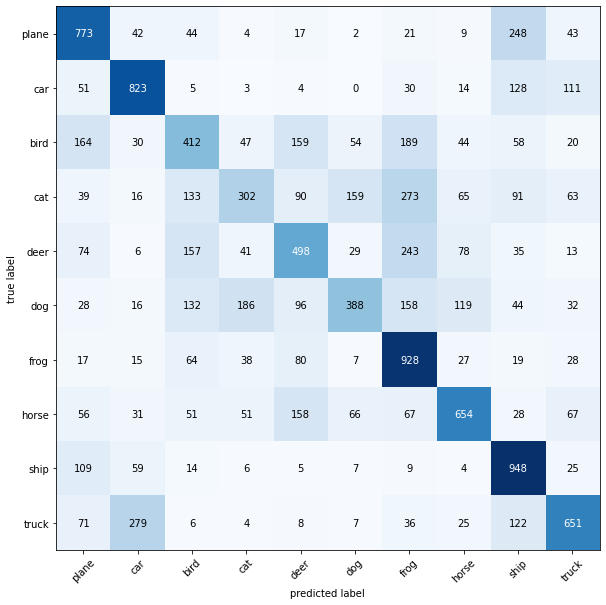

In [40]:
mat = confusion_matrix(testLabels, predictedLabels)
plot_confusion_matrix(conf_mat = mat, figsize = (10,10), class_names = classes)

truck


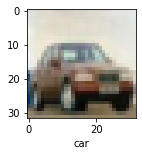

In [91]:
prediction_check(8)

In [92]:
import random
def prediction_check_text(i):
    print(classes[testLabels[i]] +" -> " +classes[predictedLabels[i]] )
    print()

bird


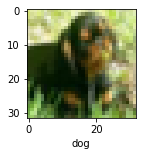

bird


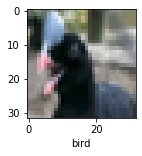

car


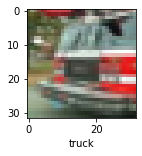

horse


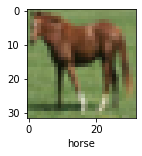

frog


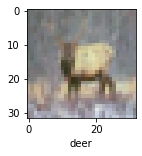

plane


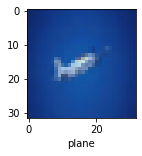

ship


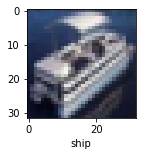

ship


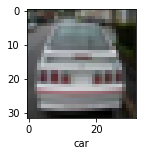

frog


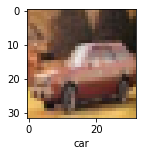

truck


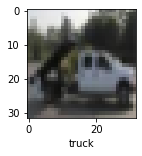

car


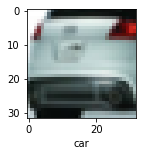

cat


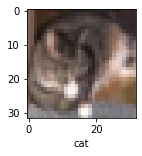

deer


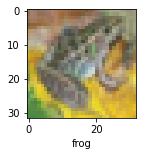

frog


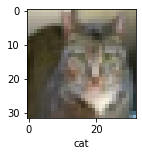

car


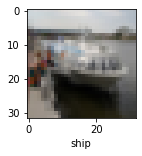

horse


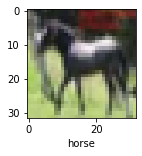

bird


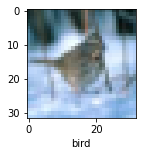

truck


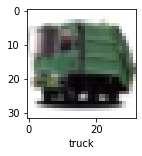

truck


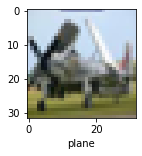

ship


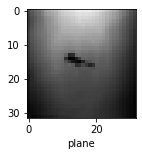

horse


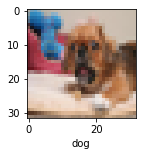

deer


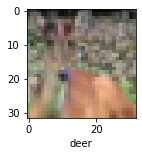

bird


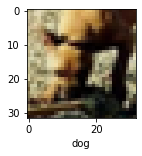

deer


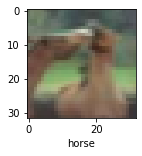

horse


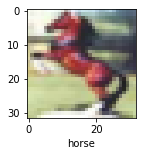

frog


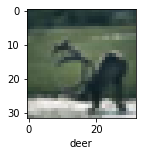

bird


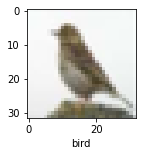

horse


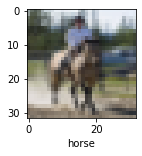

deer


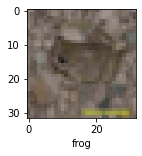

frog


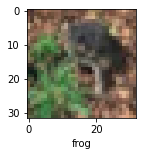

In [93]:
for x in range(30):
    prediction_check(random.randint(0,len(testLabels)))
    plt.show()
        